# CODSOFT INTERNSHIP TASK 2
## Ahmed Ali
### IRIS FLOWER CLASSIFICATION MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix , precision_score,  recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from tabulate import tabulate

# Importing dataset and performing data analysis

In [2]:
dataset = pd.read_csv("IRIS.csv")
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# data visualisation

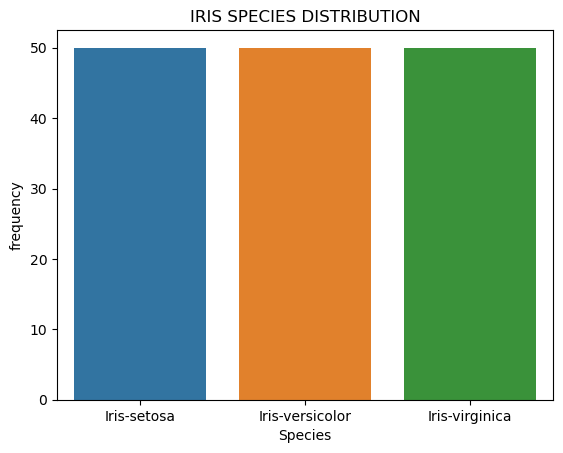

In [6]:
#Frequency distribution of species
sns.countplot(x = dataset['species'] , data = dataset)
plt.title("IRIS SPECIES DISTRIBUTION")
plt.xlabel('Species')
plt.ylabel('frequency')
plt.show()

In [8]:
import warnings
warnings.filterwarnings('ignore')

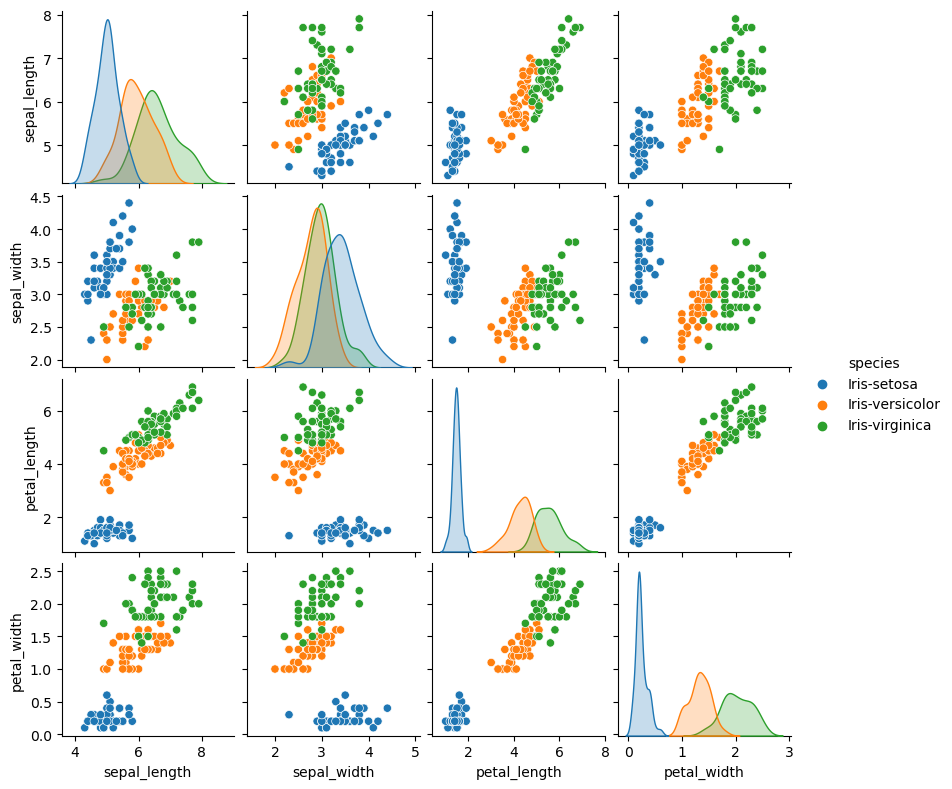

In [11]:

sns.pairplot(dataset,hue="species",height=2);
plt.show()

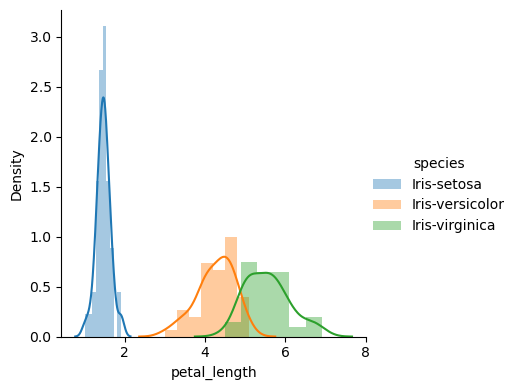

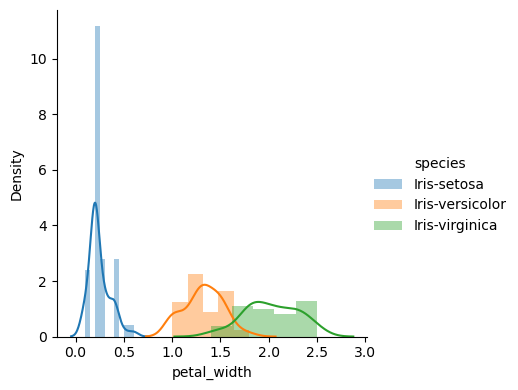

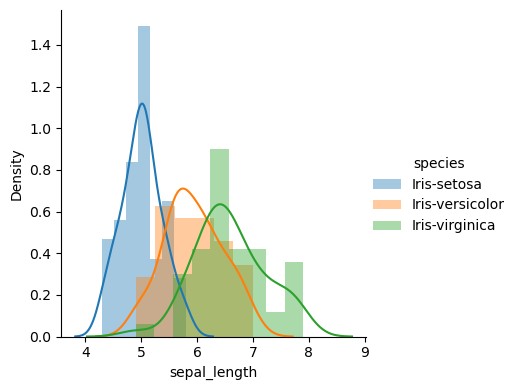

In [13]:
sns.FacetGrid(dataset,hue="species",height=4).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(dataset,hue="species",height=4).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(dataset,hue="species",height=4).map(sns.distplot,"sepal_length").add_legend()

# Creating and testing machine learning model

In [14]:
X = dataset[["sepal_length" , "sepal_width" , "petal_length" , "petal_width"]]
Y = dataset["species"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)

In [17]:
LR = LogisticRegression(max_iter=200)
LR.fit(X_train, y_train)
y_pred_1 = LR.predict(X_test)
LRAcc = accuracy_score(y_test, y_pred_1)
print('Logistic regression accuracy(%):', round(LRAcc*100,2))

Logistic regression accuracy(%): 97.78


In [19]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_2 = rf.predict(X_test)
RFCAcc = accuracy_score(y_test, y_pred_2)
print('Random Forest Classifier accuracy:', round(RFCAcc*100,2))

Random Forest Classifier accuracy: 97.78


In [20]:
models = pd.DataFrame ({'Model' : ['Logestic Regression', 'Random Forest'] ,
                        'Precision' : [precision_score(y_test, y_pred_1, average='weighted') , precision_score(y_test, y_pred_2, average='weighted')] ,
                        'Recall' : [recall_score(y_test, y_pred_1, average='weighted') , recall_score(y_test, y_pred_2, average='weighted') ] ,
                        'F1-score' : [f1_score(y_test, y_pred_1, average='weighted') , f1_score(y_test, y_pred_2, average='weighted')] ,
                        'Accuracy' : [accuracy_score(y_test, y_pred_1) , accuracy_score(y_test, y_pred_2)]})

print(tabulate(models, headers='keys', tablefmt='rst'))

====  ===================  ===========  ========  ==========  ==========
  ..  Model                  Precision    Recall    F1-score    Accuracy
====  ===================  ===========  ========  ==========  ==========
   0  Logestic Regression      0.97963  0.977778    0.977943    0.977778
   1  Random Forest            0.97963  0.977778    0.977943    0.977778
====  ===================  ===========  ========  ==========  ==========


In [21]:
new_input = pd.DataFrame({
    'sepal_length': [5.3],
    'sepal_width': [3.5],
    'petal_length': [1.4],
    'petal_width': [0.4],
})

# Make predictions on the input data
predictions = rf.predict(new_input)

# Print the predicted rating
print("Predicted Sales:", predictions[0])

Predicted Sales: Iris-setosa
